GROUP ASSIGNMENT - Puck de Bruin (1665650), ...

First, install packages

In [56]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split

Read cvs files

In [57]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [58]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


In [59]:
df= df1.append(df2,ignore_index=True)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. 

In [60]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])

In [61]:
df_with_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_with_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,13.691100,0.017897,-3.332878,0.492481,251.330,237.218,251.089247,90,0,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,12.799172,0.210081,-3.948066,0.661884,267.350,250.214,267.092914,98,0,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,12.223679,0.646387,-3.783460,0.767040,223.703,209.591,223.076392,80,0,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,14.110619,0.366586,-4.404360,0.561228,423.542,398.342,423.172896,156,0,...,1,0,0,0,0,0,0,0,0,0


In [62]:
correlation_matrix = df_with_descriptors.corr().abs()
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
df_filtered = df_with_descriptors.drop(columns=highly_correlated_columns)
df_filtered

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,0.060465,-5.034549,0.520365,463.542,0,0.249868,-0.496477,1.323529,10.907235,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,0.259504,-3.442212,0.498564,378.457,0,0.230353,-0.467476,1.259259,11.297748,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,0.626646,-5.536518,0.382043,477.589,0,0.348615,-0.492903,1.485714,10.160364,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,0.338689,-3.767788,0.795948,330.609,0,0.351723,-0.421732,1.555556,11.220549,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,0.107779,-5.727217,0.687618,419.553,0,0.231765,-0.301646,1.518519,12.204811,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,0.017897,-3.332878,0.492481,251.330,0,0.192599,-0.331334,1.705882,10.971568,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,0.210081,-3.948066,0.661884,267.350,0,0.340670,-0.465332,1.444444,10.106796,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,0.646387,-3.783460,0.767040,223.703,0,0.234904,-0.348256,1.866667,9.968710,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,0.366586,-4.404360,0.561228,423.542,0,0.232788,-0.496766,1.400000,10.910674,...,1,0,0,0,0,0,0,0,0,0


In [63]:
nunique = df_filtered.nunique()
cols_to_drop = nunique[nunique == 1].index
df_filtered=df_filtered.drop(cols_to_drop, axis=1)
df_filtered

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,10.907235,-0.245747,...,0,0,0,0,0,1,0,0,0,0
1,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,11.297748,-0.166571,...,0,1,0,0,0,0,0,0,0,0
2,10.154031,0.626646,-5.536518,0.382043,477.589,0.348615,-0.492903,1.485714,10.160364,-0.247542,...,1,0,0,0,0,1,0,0,0,0
3,11.964559,0.338689,-3.767788,0.795948,330.609,0.351723,-0.421732,1.555556,11.220549,-0.249006,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,0.107779,-5.727217,0.687618,419.553,0.231765,-0.301646,1.518519,12.204811,-0.242674,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,0.017897,-3.332878,0.492481,251.330,0.192599,-0.331334,1.705882,10.971568,-0.243604,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,0.210081,-3.948066,0.661884,267.350,0.340670,-0.465332,1.444444,10.106796,-0.245746,...,0,0,0,0,0,0,0,0,1,0
1997,12.223679,0.646387,-3.783460,0.767040,223.703,0.234904,-0.348256,1.866667,9.968710,-0.186025,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,0.366586,-4.404360,0.561228,423.542,0.232788,-0.496766,1.400000,10.910674,-0.246290,...,0,1,0,0,0,0,0,0,0,0


In [64]:
merged_df = df.join(df_filtered)
merged_df

,SMILES,ALDH1_inhibition,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,...,0,0,0,0,0,1,0,0,0,0
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,...,0,1,0,0,0,0,0,0,0,0
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,10.154031,0.626646,-5.536518,0.382043,477.589,0.348615,-0.492903,1.485714,...,1,0,0,0,0,1,0,0,0,0
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,11.964559,0.338689,-3.767788,0.795948,330.609,0.351723,-0.421732,1.555556,...,0,0,0,0,0,0,0,0,0,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,12.970682,0.107779,-5.727217,0.687618,419.553,0.231765,-0.301646,1.518519,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1,13.691100,0.017897,-3.332878,0.492481,251.330,0.192599,-0.331334,1.705882,...,0,0,0,0,0,0,0,0,0,0
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1,12.799172,0.210081,-3.948066,0.661884,267.350,0.340670,-0.465332,1.444444,...,0,0,0,0,0,0,0,0,1,0
1997,O=C(CCl)NC1CCCc2ccccc21,1,12.223679,0.646387,-3.783460,0.767040,223.703,0.234904,-0.348256,1.866667,...,0,0,0,0,0,0,0,0,0,0
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1,14.110619,0.366586,-4.404360,0.561228,423.542,0.232788,-0.496766,1.400000,...,0,1,0,0,0,0,0,0,0,0


In [65]:
data_missing=merged_df.isnull()
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


In [66]:
df_duplicate = merged_df[merged_df.duplicated()]
if len(df_duplicate)==0:
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))
merged_df=merged_df.drop_duplicates()
merged_df=merged_df.set_index("SMILES")

The amount of duplicated rows is 25


Scale the data with MinMax scaling

In [67]:
label=merged_df["ALDH1_inhibition"]
merged_df=merged_df.drop("ALDH1_inhibition",axis=1)
desc_names=list(merged_df.columns.values)

In [68]:
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(merged_df)
df_minmax = pd.DataFrame(df_minmax, columns=desc_names)
display(df_minmax)


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,0.872370,0.018185,0.374411,0.492906,0.689213,0.391821,0.468063,0.441894,0.308558,0.000293,...,0.00,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.741976,0.078075,0.576463,0.466743,0.502704,0.355044,0.503933,0.407407,0.319482,0.006842,...,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473174,0.188548,0.310716,0.326910,0.720005,0.577908,0.472483,0.528920,0.287666,0.000145,...,0.25,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,0.633976,0.101902,0.535150,0.823627,0.397819,0.583765,0.560515,0.566396,0.317322,0.000024,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.723335,0.032421,0.286518,0.693622,0.592788,0.357705,0.709049,0.546522,0.344855,0.000547,...,0.00,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,0.787319,0.005376,0.590336,0.459444,0.224037,0.283897,0.672329,0.647059,0.310357,0.000470,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.708102,0.063204,0.512275,0.662740,0.259153,0.562935,0.506586,0.506775,0.286167,0.000293,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
1972,0.656990,0.194487,0.533162,0.788935,0.163478,0.363622,0.651397,0.733333,0.282304,0.005233,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.824579,0.110296,0.454376,0.541945,0.601532,0.359633,0.467705,0.482927,0.308654,0.000248,...,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determine how many principal components are needed for the analysis

,0
1,0.181294
2,0.263172
3,0.313574
4,0.358752
5,0.399052
...,...
154,1.000000
155,1.000000
156,1.000000
157,1.000000


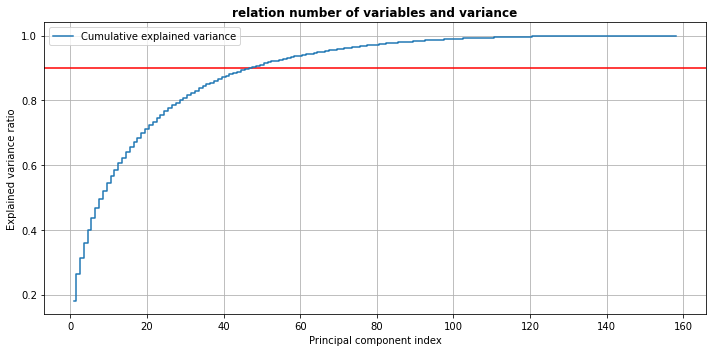

48


In [69]:
pca = PCA()

# Determine transformed features
df_pca = pca.fit_transform(df_minmax)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
#plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('relation number of variables and variance', fontweight = 'bold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#print point where variance is first above 0.9 
for i in range(1,len(df_cum_sum)): 
    if df_cum_sum[0][i] >= 0.9: 
        number_of_variables = df_cum_sum[0].index[i]
        print(number_of_variables)
        break

Find out what how relevant the features are for the PC's 

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
MaxAbsEStateIndex,0.211475,0.112086,0.040075,0.011918,0.177325,0.111096,0.057996,0.173795,0.021360,0.153376,...,0.082885,0.052376,0.079743,0.253236,0.018811,0.096019,0.252858,0.024679,0.191778,0.104757
MinAbsEStateIndex,0.090358,0.083054,0.034504,0.077521,0.010669,0.061163,0.040402,0.014735,0.048584,0.062487,...,0.082463,0.209665,0.065521,0.026358,0.023966,0.042132,0.061660,0.055100,0.042565,0.030868
MinEStateIndex,0.206700,0.005749,0.030181,0.059242,0.023701,0.013260,0.208144,0.146079,0.154417,0.012565,...,0.011643,0.130320,0.073038,0.035440,0.048236,0.024461,0.006386,0.009402,0.084814,0.143763
qed,0.041089,0.174396,0.012665,0.021972,0.034500,0.055496,0.144710,0.154391,0.015070,0.256300,...,0.088990,0.201535,0.166263,0.011598,0.036899,0.046780,0.266655,0.123352,0.077869,0.046637
MolWt,0.163015,0.232595,0.007178,0.010244,0.061218,0.105903,0.093307,0.042516,0.047874,0.003866,...,0.029868,0.016622,0.021774,0.008191,0.018870,0.005161,0.062276,0.011104,0.001386,0.040816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_tetrazole,0.007717,0.022979,0.042093,0.019922,0.018329,0.008794,0.001766,0.004709,0.020050,0.060330,...,0.177475,0.037191,0.063371,0.055185,0.141341,0.002826,0.062877,0.013200,0.040631,0.087999
fr_thiazole,0.030850,0.023056,0.049469,0.064415,0.051844,0.031013,0.041621,0.156449,0.068086,0.090070,...,0.036607,0.116268,0.017886,0.069601,0.007809,0.030091,0.004452,0.058569,0.023464,0.082370
fr_thiocyan,0.000531,0.001808,0.000038,0.000064,0.000109,0.000755,0.000814,0.001839,0.001422,0.002617,...,0.003182,0.000488,0.008624,0.000137,0.003398,0.009755,0.001688,0.002872,0.000906,0.001383
fr_thiophene,0.005659,0.012847,0.088997,0.023574,0.061921,0.004881,0.010621,0.105699,0.022189,0.146719,...,0.039926,0.061711,0.160841,0.052759,0.003874,0.014035,0.030365,0.042650,0.029691,0.100780


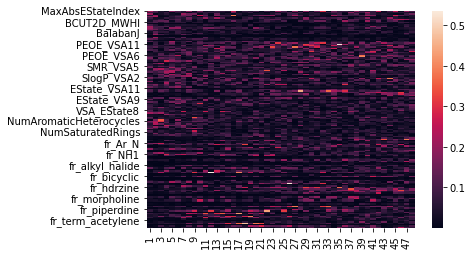

In [70]:
n_components = number_of_variables
pca = PCA(n_components = n_components)
components = pca.fit_transform(df_minmax)
df_pc = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()
display(df_pc)

sn.heatmap(df_pc, annot=False)
plt.show()


Evaluate which features are important per PC

In [71]:
"""threshold = 0.21
percentage = 95

df_high_value = df_pc[df_pc > threshold]

df_evaluate = df_high_value.transpose()

def show_missing(df):
    "Return a Pandas dataframe describing the contents of a source dataframe including missing values."
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

df_missing = show_missing(df_evaluate)
display(df_missing)

df_missing.drop(df_missing[df_missing['pc_missing'] >= percentage ].index, inplace = True)
df_possible_desc = df_high_value.iloc[df_missing.index,]
display(df_possible_desc)
# df_possible_desc.sum(axis=0)"""

'threshold = 0.21\npercentage = 95\n\ndf_high_value = df_pc[df_pc > threshold]\n\ndf_evaluate = df_high_value.transpose()\n\ndef show_missing(df):\n    "Return a Pandas dataframe describing the contents of a source dataframe including missing values."\n    \n    variables = []\n    dtypes = []\n    count = []\n    unique = []\n    missing = []\n    pc_missing = []\n    \n    for item in df.columns:\n        variables.append(item)\n        dtypes.append(df[item].dtype)\n        count.append(len(df[item]))\n        unique.append(len(df[item].unique()))\n        missing.append(df[item].isna().sum())\n        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))\n\n    output = pd.DataFrame({\n        \'variable\': variables, \n        \'dtype\': dtypes,\n        \'count\': count,\n        \'unique\': unique,\n        \'missing\': missing, \n        \'pc_missing\': pc_missing\n    })    \n        \n    return output\n\ndf_missing = show_missing(df_evaluate)\ndisplay(df

In the variable merged_df_incl_label, merged_df is displayed and the variable named label is added. In this way there is a dataframe with the ALDH1_inhibition column and the other columns so it is possible to split on the ALDH1_inhibition characteristic. 

In [74]:
merged_df_incl_label = merged_df.join(label)
#merged_df_incl_label 

Split the data in test data and trainings data with a ratio of 80% trainings data and 20% test data. 

In [78]:
X = merged_df_incl_label.drop('ALDH1_inhibition', axis=1)  
y = merged_df_incl_label['ALDH1_inhibition'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Apply KNN